In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,f1_score,precision_recall_curve

In [35]:
!unzip creditcard.zip

Archive:  creditcard.zip
  inflating: creditcard.csv          


In [36]:
df=pd.read_csv('creditcard.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [39]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [40]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df['Amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [43]:
df = df.drop(columns=['Time'])

In [44]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [45]:
X=df.drop('Class',axis=1)
y=df['Class']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Frauds in test:", y_test.sum())
print("Frauds in train:", y_train.sum())

Frauds in test: 98
Frauds in train: 394


In [47]:
#To train efficiently , we're generating more cases of frauds, so that model can learn the pattern efficiently and don't get overfit.
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("After SMOTE:", y_train.value_counts())

After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [48]:
from sklearn.metrics import average_precision_score

def evaluate_model(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    auprc = average_precision_score(y_test, y_scores)
    return auprc

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
lg_auprc = evaluate_model(log_reg, X_test, y_test)
print("Logistic Regression AUPRC:",lg_auprc)

Logistic Regression AUPRC: 0.7213150704689043


In [50]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_auprc=evaluate_model(nb, X_test, y_test)
print("Naive Bayes AUPRC:",nb_auprc)

Naive Bayes AUPRC: 0.08635707443775538


In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=10  # prevents overfitting
)
dt.fit(X_train, y_train)
dt_auprc=evaluate_model(dt, X_test, y_test)
print("Decision Tree AUPRC:",dt_auprc)

Decision Tree AUPRC: 0.4243836277013305


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
rf_auprc=evaluate_model(rf, X_test, y_test)
print("Random Forest AUPRC:",rf_auprc)

Random Forest AUPRC: 0.872501644694903


In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
xgb_auprc=evaluate_model(xgb, X_test, y_test)
print("XGBoost AUPRC:",xgb_auprc)

XGBoost AUPRC: 0.854602333717283


In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

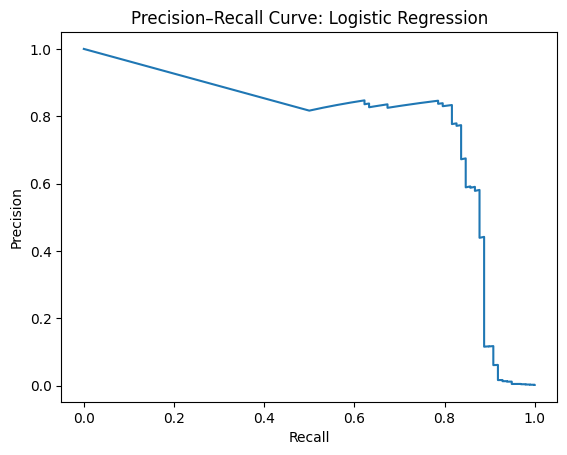

In [55]:
#Logistic Regression
y_scores = log_reg.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve: Logistic Regression")
plt.show()

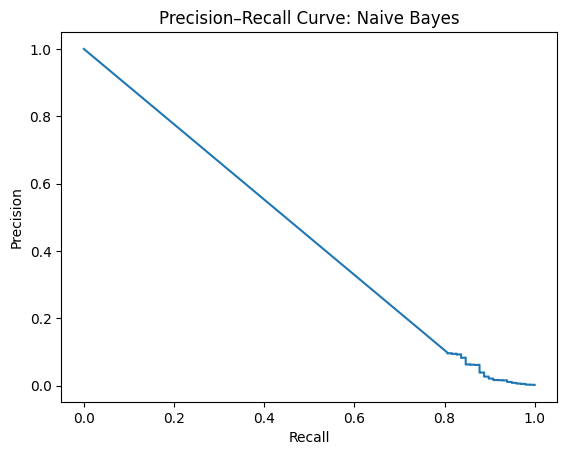

In [56]:
#Naive Bayes
y_scores = nb.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve: Naive Bayes")
plt.show()

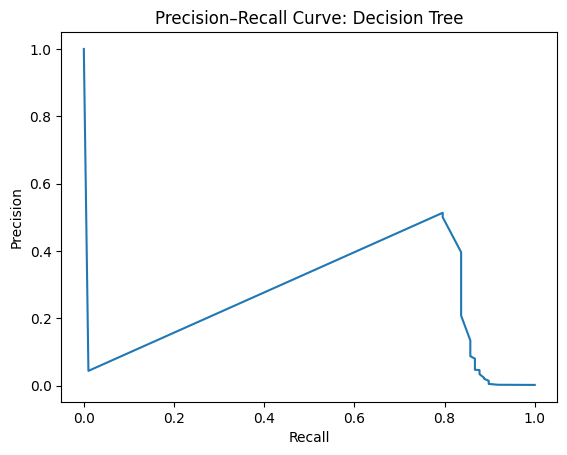

In [57]:
# Decision Tree
y_scores = dt.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve: Decision Tree")
plt.show()

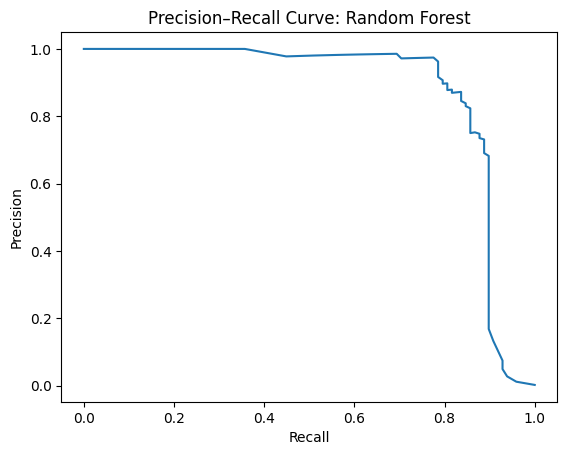

In [58]:
# Random Forest
y_scores = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve: Random Forest")
plt.show()

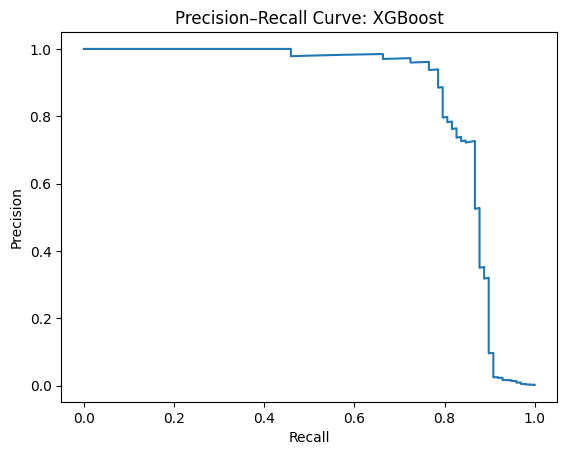

In [59]:
# XGBoost
y_scores = xgb.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.figure()
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve: XGBoost")
plt.show()

In [60]:
results = {
    "Logistic Regression": lg_auprc,
    "Naive Bayes": nb_auprc,
    "Decision Tree": dt_auprc,
    "Random Forest": rf_auprc,
    "XGBoost": xgb_auprc
}

import pandas as pd
pd.DataFrame(results.items(), columns=["Model", "AUPRC"]).sort_values("AUPRC", ascending=False)


,Model,AUPRC
3,Random Forest,0.872502
4,XGBoost,0.854602
0,Logistic Regression,0.721315
2,Decision Tree,0.424384
1,Naive Bayes,0.086357


In [61]:
y_scores = rf.predict_proba(X_test)[:, 1]

threshold = 0.2
y_pred = (y_scores >= threshold).astype(int)

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[56801,    63],
       [   10,    88]])

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision, recall, f1

(0.5827814569536424, 0.8979591836734694, 0.7068273092369478)

Using Random Forest with a decision threshold of 0.2, the model achieved a recall of 89.8%, successfully identifying most fraudulent transactions, while maintaining a precision of 58.3%. Although some false positives were introduced, this tradeoff is acceptable in fraud detection where minimizing missed frauds is critical

#Below code will be computation of metrics for other models, so that we can import all the models in power bi and make a good analysis

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

def threshold_metrics(model, X_test, y_test, threshold=0.2):
    y_scores = model.predict_proba(X_test)[:, 1]
    y_pred = (y_scores >= threshold).astype(int)

    return (
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    )

In [65]:
# Logistic Regression
lg_precision, lg_recall, lg_f1 = threshold_metrics(
    log_reg, X_test, y_test
)

# Naive Bayes
nb_precision, nb_recall, nb_f1 = threshold_metrics(
    nb, X_test, y_test
)

# Decision Tree
dt_precision, dt_recall, dt_f1 = threshold_metrics(
    dt, X_test, y_test
)

# Random Forest (you already did this, but for consistency)
rf_precision, rf_recall, rf_f1 = threshold_metrics(
    rf, X_test, y_test
)

# XGBoost
xgb_precision, xgb_recall, xgb_f1 = threshold_metrics(
    xgb, X_test, y_test
)

In [66]:
results_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest",
        "XGBoost"
    ],
    "AUPRC": [
        lg_auprc,
        nb_auprc,
        dt_auprc,
        rf_auprc,
        xgb_auprc
    ],
    "Precision": [
        lg_precision,
        nb_precision,
        dt_precision,
        rf_precision,
        xgb_precision
    ],
    "Recall": [
        lg_recall,
        nb_recall,
        dt_recall,
        rf_recall,
        xgb_recall
    ],
    "F1": [
        lg_f1,
        nb_f1,
        dt_f1,
        rf_f1,
        xgb_f1
    ],
    "Threshold": [
        0.2, 0.2, 0.2, 0.2, 0.2
    ]
})

results_df

,Model,AUPRC,Precision,Recall,F1,Threshold
0,Logistic Regression,0.721315,0.016184,0.928571,0.031813,0.2
1,Naive Bayes,0.086357,0.053218,0.877551,0.100350,0.2
2,Decision Tree,0.424384,0.055884,0.867347,0.105003,0.2
3,Random Forest,0.872502,0.582781,0.897959,0.706827,0.2
4,XGBoost,0.854602,0.193407,0.897959,0.318264,0.2


In [67]:
results_df.to_csv("fraud_model_metrics_all.csv", index=False)

In [68]:
def confusion_matrix_df(model, X_test, y_test, model_name, threshold=0.2):
    y_scores = model.predict_proba(X_test)[:, 1]
    y_pred = (y_scores >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    df = pd.DataFrame(
        cm,
        index=["Actual Normal", "Actual Fraud"],
        columns=["Predicted Normal", "Predicted Fraud"]
    )

    df["Model"] = model_name
    df["Threshold"] = threshold
    return df

In [69]:
cm_log = confusion_matrix_df(log_reg, X_test, y_test, "Logistic Regression")
cm_nb  = confusion_matrix_df(nb, X_test, y_test, "Naive Bayes")
cm_dt  = confusion_matrix_df(dt, X_test, y_test, "Decision Tree")
cm_rf  = confusion_matrix_df(rf, X_test, y_test, "Random Forest")
cm_xgb = confusion_matrix_df(xgb, X_test, y_test, "XGBoost")

In [72]:
cm_all = pd.concat([cm_log, cm_nb, cm_dt, cm_rf, cm_xgb])
cm_all.to_csv("confusion_matrices_all_models.csv")
cm_all

,Predicted Normal,Predicted Fraud,Model,Threshold
Actual Normal,51332,5532,Logistic Regression,0.2
Actual Fraud,7,91,Logistic Regression,0.2
Actual Normal,55334,1530,Naive Bayes,0.2
Actual Fraud,12,86,Naive Bayes,0.2
Actual Normal,55428,1436,Decision Tree,0.2
Actual Fraud,13,85,Decision Tree,0.2
Actual Normal,56801,63,Random Forest,0.2
Actual Fraud,10,88,Random Forest,0.2
Actual Normal,56497,367,XGBoost,0.2
Actual Fraud,10,88,XGBoost,0.2
